In [1]:
# Importing libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Reading the data

In [4]:
file_name = "https://raw.githubusercontent.com/itsahmedmohamedamin/Marketing-Analytics-What-Drives-Ad-Performance/main/bank-full.csv"
bank = pd.read_csv(file_name, sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Summary of the Data Frame
print("Rows       : ", bank.shape[0])
print("Columns    : ", bank.shape[1])
print("\nFeatures : \n", bank.columns.tolist())
print("\nMissing values : ", bank.isnull().sum().values.sum())
print ("\nUnique values :  \n", bank.nunique())
bank.describe()
bank.info()

Rows       :  45211
Columns    :  17

Features : 
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Missing values :  0

Unique values :  
 age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 

In [6]:
# Cleaning and preprocessing the data

In [7]:
# Convert y from yes and no to 0s and 1s
bank['converted'] = bank['y'].apply(lambda x: 0 if x == 'no' else 1)
del bank['y']
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [8]:
# Conversion rate by campaign
conversions_by_campaign = bank.groupby('campaign')['converted'].sum() / bank.groupby('campaign')['converted'].count() * 100
conversions_by_campaign.head(10)

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
Name: converted, dtype: float64

In [9]:
# Conversion rate by job
conversion_rate_by_job = bank.groupby(by='job')['converted'].sum() / bank.groupby(by='job')['converted'].count() * 100
conversion_rate_by_job.head(10)

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
Name: converted, dtype: float64

In [10]:
bank = bank.dropna()

In [11]:
# Encoding Categorical Data

In [12]:
# Get category type columns
cols = bank.columns
num_cols = bank._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['contact',
 'loan',
 'month',
 'job',
 'education',
 'poutcome',
 'marital',
 'housing',
 'default']

In [13]:
bank.groupby('month')['converted'].count()

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
Name: converted, dtype: int64

In [14]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
bank['month'] = bank['month'].apply(lambda x: months.index(x) + 1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0


In [15]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [16]:
bank = pd.get_dummies(data=bank, columns=['job'])
bank.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,tertiary,no,2143,yes,no,unknown,5,5,...,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,29,yes,no,unknown,5,5,...,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,no,2,yes,yes,unknown,5,5,...,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,no,1506,yes,no,unknown,5,5,...,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,no,1,no,no,unknown,5,5,...,0,0,0,0,0,0,0,0,0,1


In [17]:
bank = pd.get_dummies(data=bank, columns=['marital'])
bank.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,yes,no,unknown,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,yes,no,unknown,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,yes,yes,unknown,5,5,76,...,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,yes,no,unknown,5,5,92,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,no,no,unknown,5,5,198,...,0,0,0,0,0,0,1,0,0,1


In [18]:
bank['housing'] = bank['housing'].map(lambda s :1 if s == 'yes' else 0)
bank.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'converted', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

In [19]:
bank['loan'] = bank['loan'].map(lambda s :1  if s == 'yes' else 0)
bank.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'converted', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

In [20]:
bank = pd.get_dummies(data=bank, columns=['education'])
bank.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'converted', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown'],
      dtype='object')

In [21]:
bank = pd.get_dummies(data=bank, columns=['contact'])
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,no,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,1,0,5,5,151,1,-1,...,0,0,1,0,1,0,0,0,0,1
2,33,no,2,1,1,5,5,76,1,-1,...,0,1,0,0,1,0,0,0,0,1
3,47,no,1506,1,0,5,5,92,1,-1,...,0,1,0,0,0,0,1,0,0,1
4,33,no,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,0,1,0,0,1


In [22]:
bank = pd.get_dummies(data=bank, columns=['default'])
bank.head()

,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes
0,58,2143,1,0,5,5,261,1,-1,0,...,0,0,0,1,0,0,0,1,1,0
1,44,29,1,0,5,5,151,1,-1,0,...,1,0,1,0,0,0,0,1,1,0
2,33,2,1,1,5,5,76,1,-1,0,...,0,0,1,0,0,0,0,1,1,0
3,47,1506,1,0,5,5,92,1,-1,0,...,0,0,0,0,1,0,0,1,1,0
4,33,1,0,0,5,5,198,1,-1,0,...,1,0,0,0,1,0,0,1,1,0


In [23]:
bank = pd.get_dummies(data=bank, columns=['poutcome'])
bank.columns

Index(['age', 'balance', 'housing', 'loan', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'converted', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'default_no', 'default_yes', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [24]:
# Checking if there are any categoric columns are left
cols = bank.columns
num_cols = bank._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

[]

In [25]:
job_columns = [
    'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
    'job_management', 'job_retired', 'job_self-employed', 'job_services',
    'job_student', 'job_technician', 'job_unemployed', 'job_unknown'
]
marital_columns = ['marital_divorced', 'marital_married', 'marital_single']
education_columns = [
    'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown'
]
bank['month_numeric'] = bank['month'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
                                           'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})
monthly_conversion_rates = bank.groupby('month')['converted'].apply(lambda x: sum(x)*100/len(x)).reset_index()
poutcome_columns = ['poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
bank['duration_bins'] = pd.cut(bank['duration'], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, max(bank['duration'])])

In [26]:
#Visualizing data

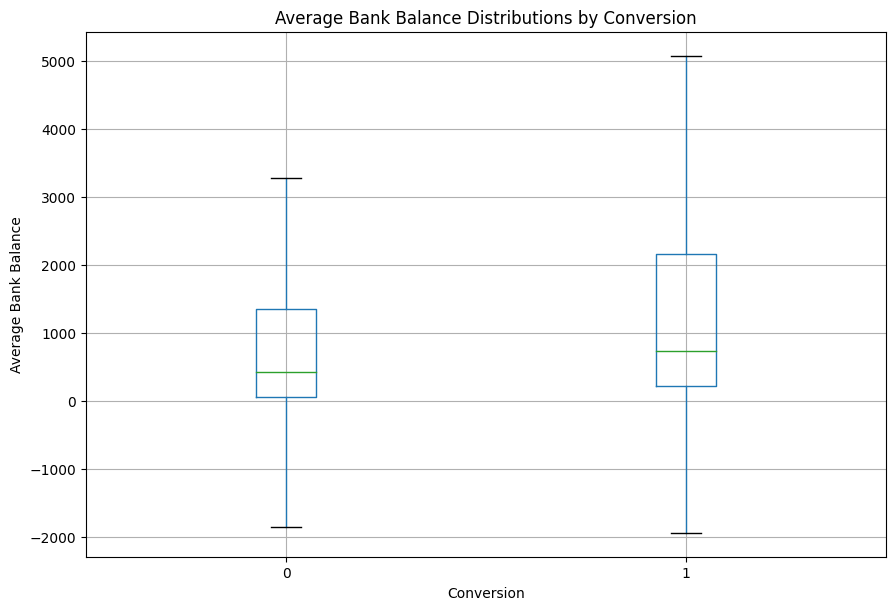

In [27]:
# Visualize how the output variable (converted) changes with different incomes
ax = bank[['converted', 'balance']].boxplot(by='converted', showfliers=False, figsize=(10, 7))
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("")
plt.show()

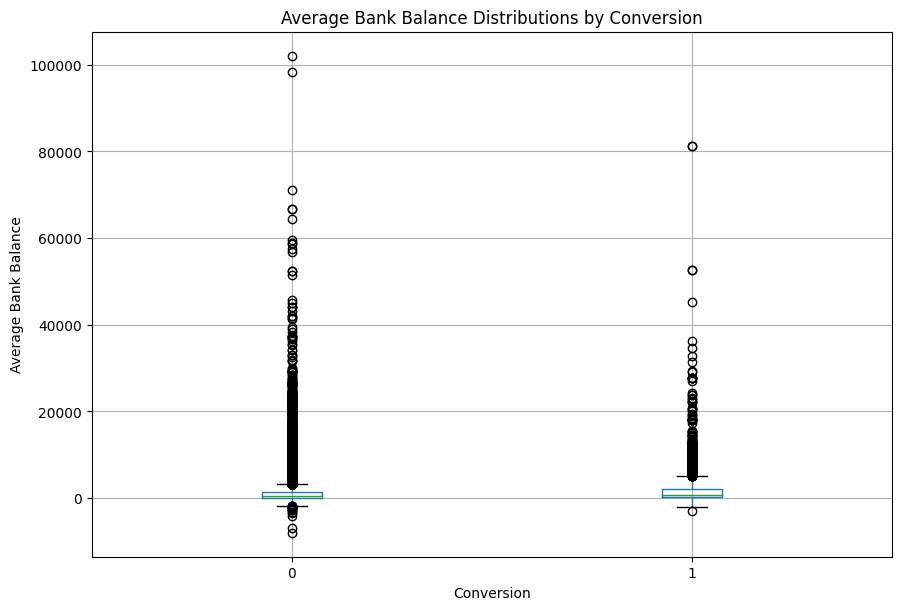

In [28]:
# Visualize how the output variable (converted) changes with different incomes
ax = bank[['converted', 'balance']].boxplot(by='converted', showfliers=True, figsize=(10, 7))
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("")
plt.show()

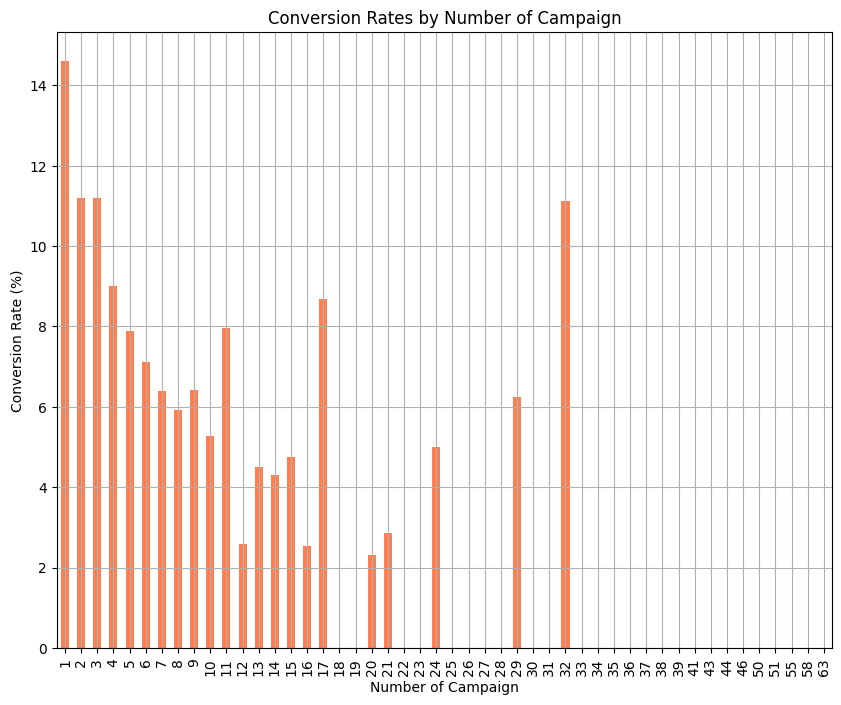

In [29]:
# Visualizing conversions by contact
ax = conversions_by_campaign.plot(
    kind='bar',
    figsize=(10, 8),
    title='Conversion Rates by Number of Campaign',
    grid=True,
    color='coral'
)
ax.set_xlabel('Number of Campaign')
ax.set_ylabel('Conversion Rate (%)')
plt.show()

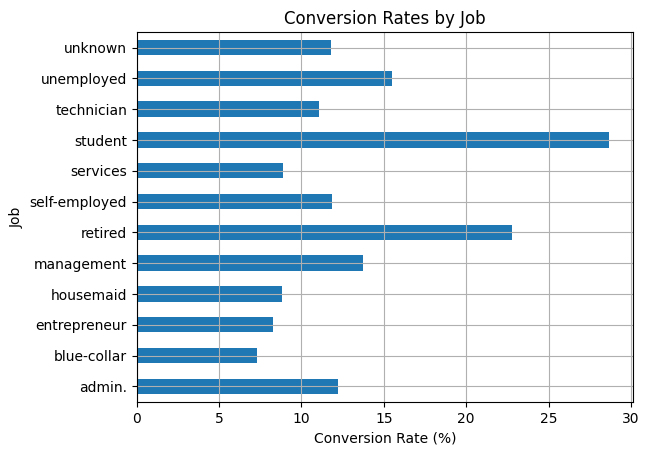

In [30]:
# Visualizing conversion rate by job
ax = conversion_rate_by_job.plot(kind='barh', grid=True, title='Conversion Rates by Job')
ax.set_xlabel('Conversion Rate (%)')
ax.set_ylabel('Job')
plt.show()

<ipython-input-31-327e69d6b779>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=bank, x='converted', y='age', palette='muted', split=False)


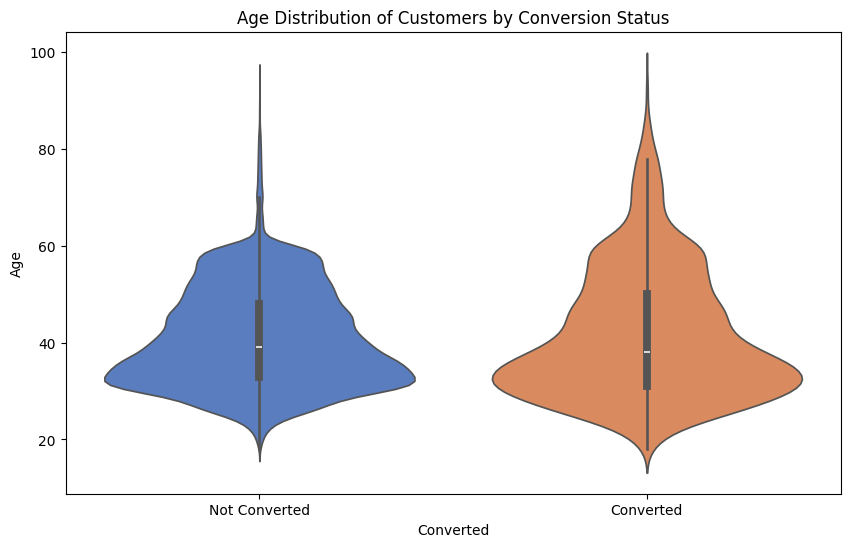

In [31]:
#Age Distribution of Customers
plt.figure(figsize=(10, 6))
sns.violinplot(data=bank, x='converted', y='age', palette='muted', split=False)
plt.title('Age Distribution of Customers by Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['Not Converted', 'Converted'])  # Adjust labels according to your data
plt.show()


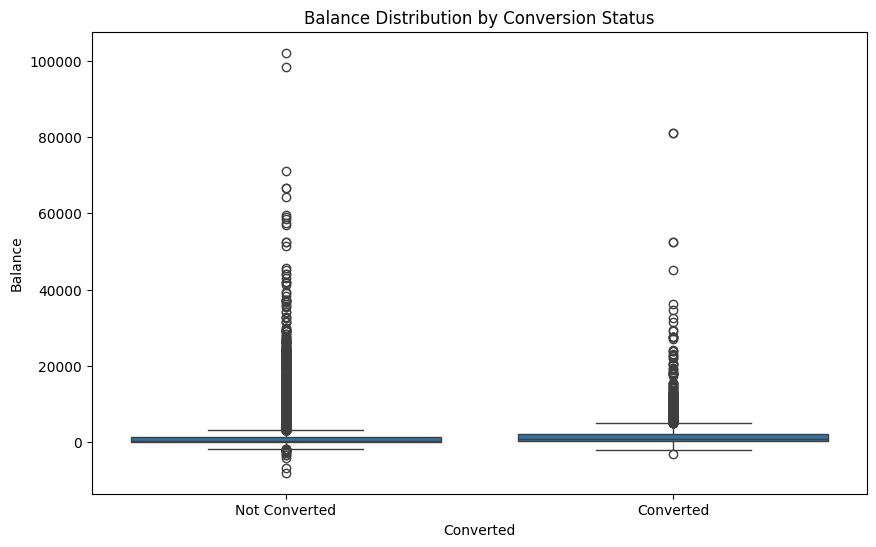

In [32]:
# Balance VS Converted
plt.figure(figsize=(10, 6))
sns.boxplot(data=bank, x='converted', y='balance')
plt.title('Balance Distribution by Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Balance')
plt.xticks([0, 1], ['Not Converted', 'Converted'])  # Assuming 'converted' is binary (0 or 1)
plt.show()

<ipython-input-33-e6c4d7a87840>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Conversion Rate (%)', x='Job Type', data=conversion_df, palette='coolwarm')


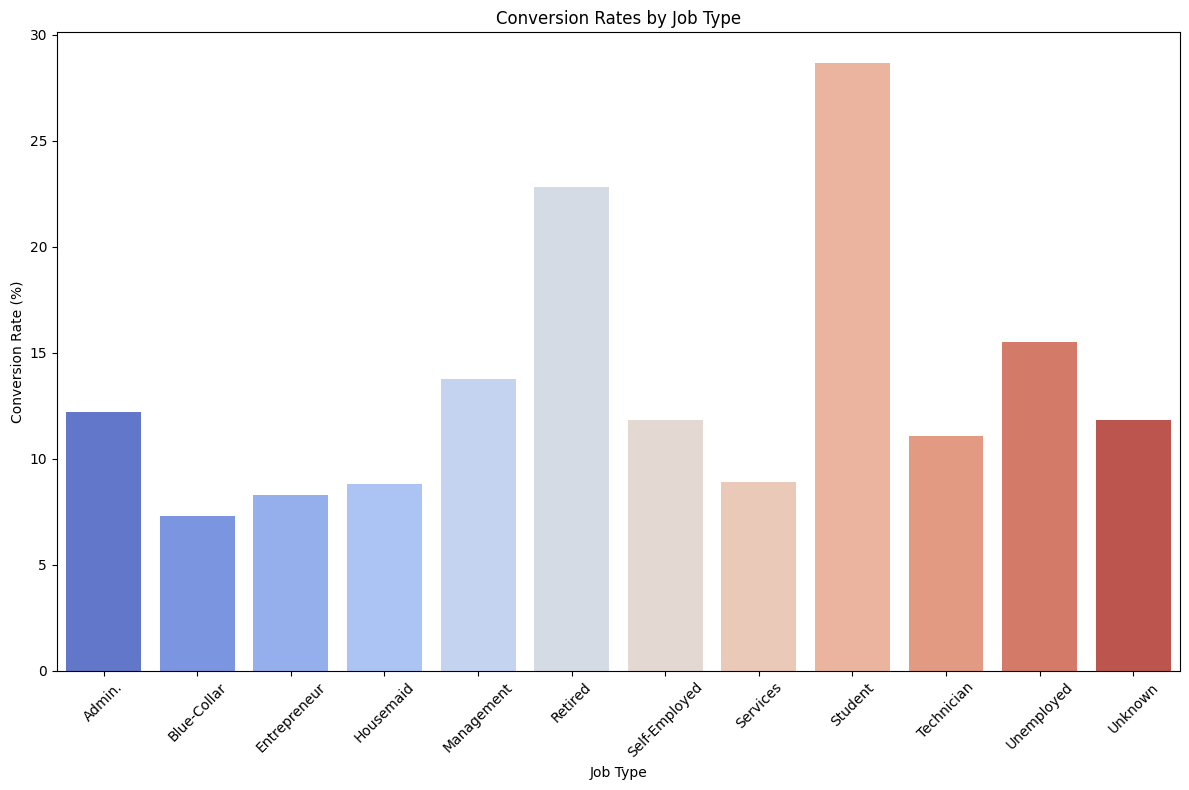

In [33]:
# Conversion Rates by Job Type
conversion_rates = []

for job in job_columns:
    conversions = (bank[job] * bank['converted']).sum()
    total = bank[job].sum()
    conversion_rate = (conversions / total) * 100 if total > 0 else 0
    conversion_rates.append(conversion_rate)
conversion_df = pd.DataFrame({
    'Job Type': [job.replace('job_', '').replace('_', ' ').title() for job in job_columns],
    'Conversion Rate (%)': conversion_rates
})

plt.figure(figsize=(12, 8))
sns.barplot(y='Conversion Rate (%)', x='Job Type', data=conversion_df, palette='coolwarm')
plt.title('Conversion Rates by Job Type')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Job Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-34-dcc04e85dfe0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital Status', y='Conversion Rate (%)', data=marital_df, palette='viridis')


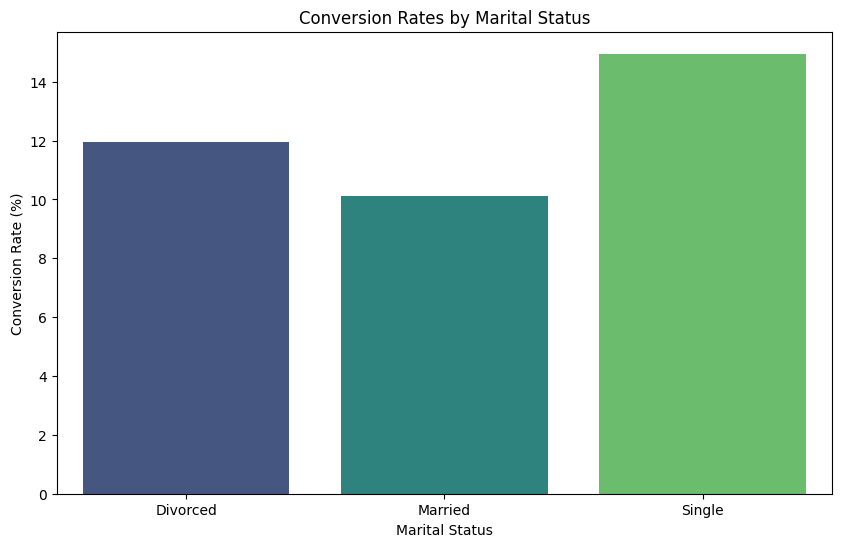

In [34]:
# Marital Status and Conversion
marital_conversion_rates = []
for marital in marital_columns:
    conversions = (bank[marital] * bank['converted']).sum()
    total = bank[marital].sum()
    conversion_rate = (conversions / total) * 100 if total > 0 else 0
    marital_conversion_rates.append(conversion_rate)
marital_df = pd.DataFrame({
    'Marital Status': [marital.replace('marital_', '').capitalize() for marital in marital_columns],
    'Conversion Rate (%)': marital_conversion_rates  # Using the new variable name here
})
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital Status', y='Conversion Rate (%)', data=marital_df, palette='viridis')
plt.title('Conversion Rates by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Conversion Rate (%)')
plt.show()

<ipython-input-35-48b27d2e292a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education Level', y='Conversion Rate (%)', data=education_df, palette='Set2')


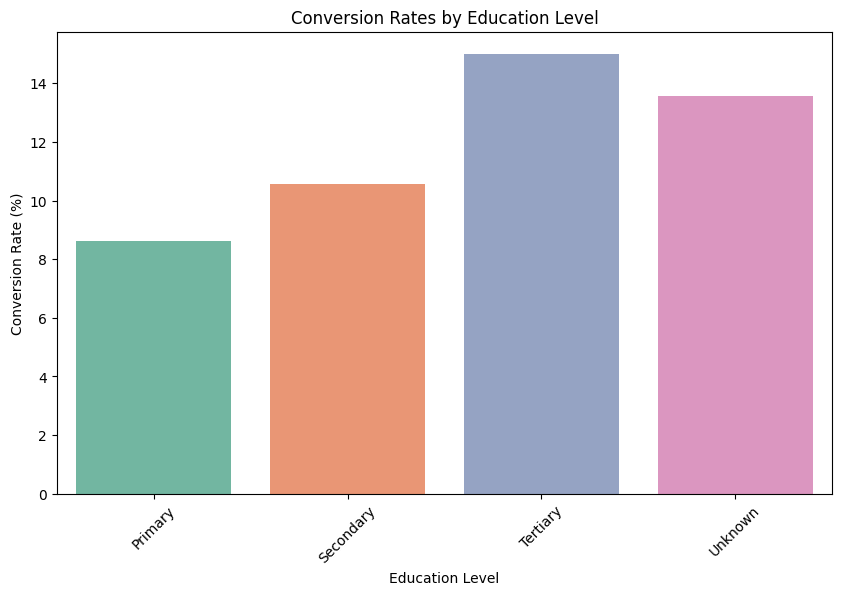

In [35]:
# Education and Conversion
edu_conversion_rates = []
for edu in education_columns:
    conversions = (bank[edu] * bank['converted']).sum()
    total = bank[edu].sum()
    conversion_rate = (conversions / total) * 100 if total > 0 else 0
    edu_conversion_rates.append(conversion_rate)
education_df = pd.DataFrame({
    'Education Level': [edu.replace('education_', '').capitalize() for edu in education_columns],
    'Conversion Rate (%)': edu_conversion_rates
})
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Conversion Rate (%)', data=education_df, palette='Set2')
plt.title('Conversion Rates by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

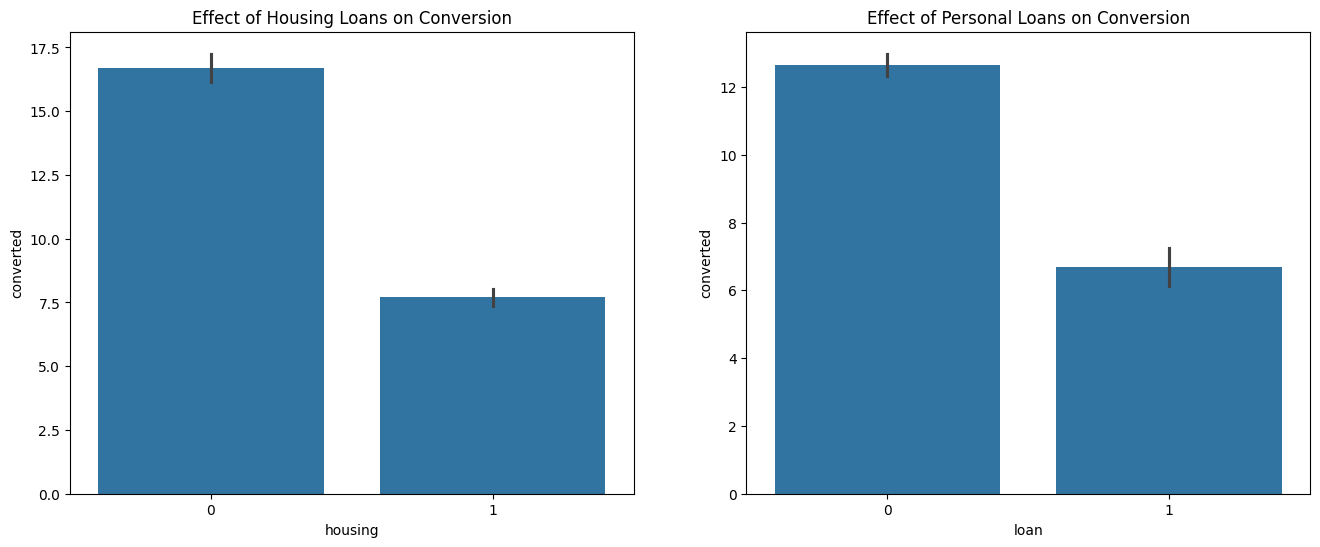

In [36]:
# Effect of Housing and Personal Loans on Conversion
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=bank, x='housing', y='converted', estimator=lambda x: sum(x)*100/len(x), ax=axs[0])
axs[0].set_title('Effect of Housing Loans on Conversion')
sns.barplot(data=bank, x='loan', y='converted', estimator=lambda x: sum(x)*100/len(x), ax=axs[1])
axs[1].set_title('Effect of Personal Loans on Conversion')
plt.show()


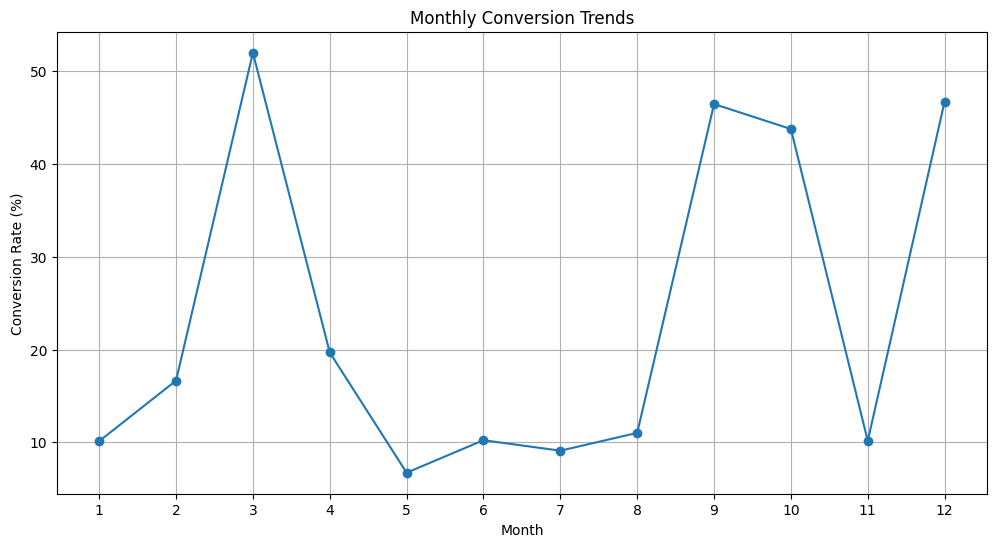

In [37]:
# Monthly Conversion Trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_conversion_rates['month'], monthly_conversion_rates['converted'], marker='o')
plt.title('Monthly Conversion Trends')
plt.xlabel('Month')
plt.ylabel('Conversion Rate (%)')
plt.xticks(range(1, 13))  # Ensure x-ticks cover all months
plt.grid(True)  # Optional: Adds a grid for better readability
plt.show()

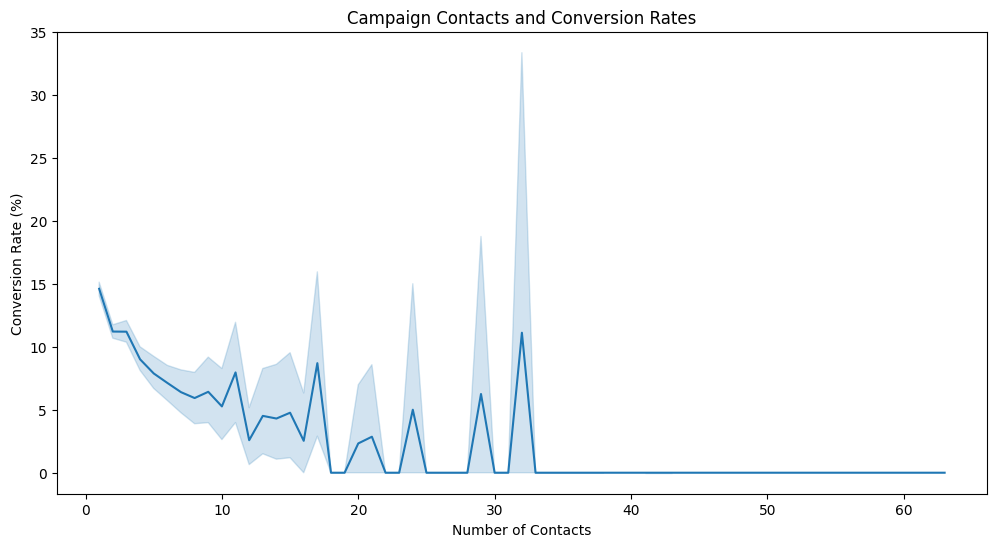

In [38]:
# Campaign Contacts and Conversion
plt.figure(figsize=(12, 6))
sns.lineplot(data=bank, x='campaign', y='converted', estimator=lambda x: sum(x)*100/len(x))
plt.title('Campaign Contacts and Conversion Rates')
plt.xlabel('Number of Contacts')
plt.ylabel('Conversion Rate (%)')
plt.show()


<ipython-input-39-b23b7f45cc30>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Previous Campaign Outcome', y='Conversion Rate (%)', data=poutcome_df, palette='Pastel1')


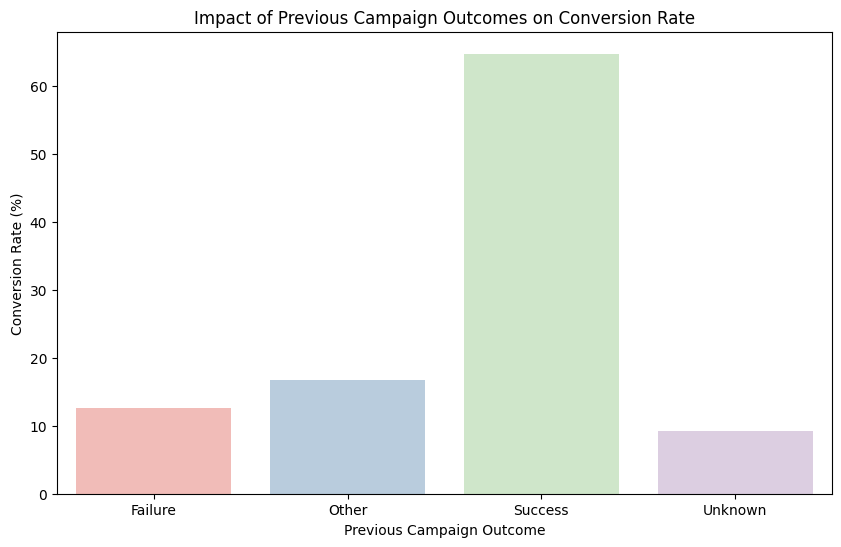

In [39]:
# Previous Campaign Outcomes
poutcome_conversion_rates = []
for outcome in poutcome_columns:
    conversions = (bank[outcome] * bank['converted']).sum()
    total = bank[outcome].sum()
    conversion_rate = (conversions / total) * 100 if total > 0 else 0
    poutcome_conversion_rates.append(conversion_rate)
poutcome_df = pd.DataFrame({
    'Previous Campaign Outcome': [outcome.replace('poutcome_', '').capitalize() for outcome in poutcome_columns],
    'Conversion Rate (%)': poutcome_conversion_rates
})
plt.figure(figsize=(10, 6))
sns.barplot(x='Previous Campaign Outcome', y='Conversion Rate (%)', data=poutcome_df, palette='Pastel1')
plt.title('Impact of Previous Campaign Outcomes on Conversion Rate')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Conversion Rate (%)')
plt.show()

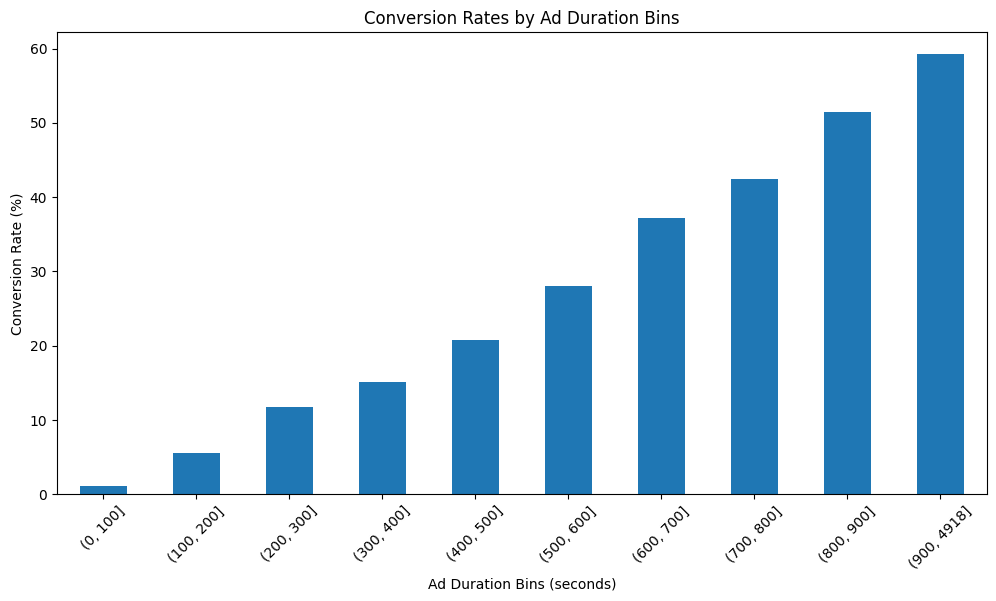

In [40]:
# Ad Duration and Conversion
conversion_rates = bank.groupby('duration_bins')['converted'].mean() * 100
plt.figure(figsize=(12, 6))
conversion_rates.plot(kind='bar')
plt.title('Conversion Rates by Ad Duration Bins')
plt.xlabel('Ad Duration Bins (seconds)')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Now, Let's create a model that predict if the customer will convert or not

In [42]:
# First model, Logistic Regression

In [43]:
# Importing libraries

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [45]:
# Preprocess the data

In [46]:
bank['duration_bins'] = bank['duration_bins'].astype(str)
bank = pd.get_dummies(bank)

In [59]:
from sklearn.model_selection import train_test_split
X = bank.drop('converted', axis=1)
y = bank['converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36168, 50)
y_train shape: (36168,)
X_test shape: (9043, 50)
y_test shape: (9043,)


In [60]:
model = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [61]:
predictions = model.predict(X_test)

In [62]:
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Accuracy: 0.8962733606104168
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.63      0.34      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043

ROC-AUC Score: 0.8916888129879182


In [71]:
y_test_reset = y_test.reset_index(drop=True)
comparison_df = pd.DataFrame({'Actual': y_test_reset, 'Predicted': predictions})
comparison_df.head(10)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [72]:
# Building the model with MLP Neural Network (Multilayer Perceptron)

In [75]:
# Import Libraries

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [84]:
model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [85]:
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
model_nn.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
2894/2894 [==============================] - 8s 2ms/step - loss: nan - accuracy: 0.8843 - val_loss: nan - val_accuracy: 0.8825
Epoch 2/100
2894/2894 [==============================] - 8s 3ms/step - loss: nan - accuracy: 0.8843 - val_loss: nan - val_accuracy: 0.8825
Epoch 3/100
2894/2894 [==============================] - 7s 2ms/step - loss: nan - accuracy: 0.8843 - val_loss: nan - val_accuracy: 0.8825
Epoch 4/100
2894/2894 [==============================] - 8s 3ms/step - loss: nan - accuracy: 0.8843 - val_loss: nan - val_accuracy: 0.8825
Epoch 5/100
2894/2894 [==============================] - 8s 3ms/step - loss: nan - accuracy: 0.8843 - val_loss: nan - val_accuracy: 0.8825
Epoch 6/100
2894/2894 [==============================] - 7s 3ms/step - loss: nan - accuracy: 0.8843 - val_loss: nan - val_accuracy: 0.8825
Epoch 7/100
2894/2894 [==============================] - 8s 3ms/step - loss: nan - accuracy: 0.8843 - val_loss: nan - val_accuracy: 0.8825
Epoch 8/100
2894/2894 [====

In [87]:
pred = model_nn.predict(X_test)

283/283 [==============================] - 0s 1ms/step


In [88]:
loss, accuracy = model_nn.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

283/283 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8794
Accuracy: 0.8793541789054871


In [89]:
pred_labels = np.where(pred.flatten() > 0.5, 1, 0)
comparison_df_nn_direct = pd.DataFrame({'Actual': y_test, 'Predicted': pred_labels})
comparison_df_nn_direct.head()

,Actual,Predicted
3776,0,0
9928,0,0
33409,0,0
31885,0,0
15738,0,0
